# Name = Bhatt Jineet Ashwinkumar
# Major_Project = Hierarchical Clustering for Customer Data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [34]:
project_path = os.getcwd()
file_path = project_path + '/Mall_Customers.csv'
df = pd.read_csv(file_path)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Basic EDA

In [35]:
df.shape

(200, 5)

In [36]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


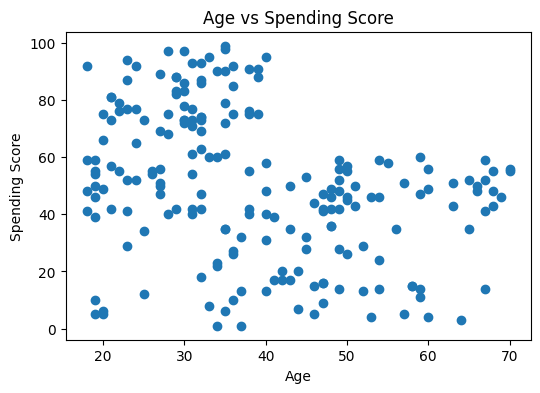

In [39]:
plt.figure(figsize=(6,4))
plt.scatter(X['Age'], X['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Score")
plt.show()

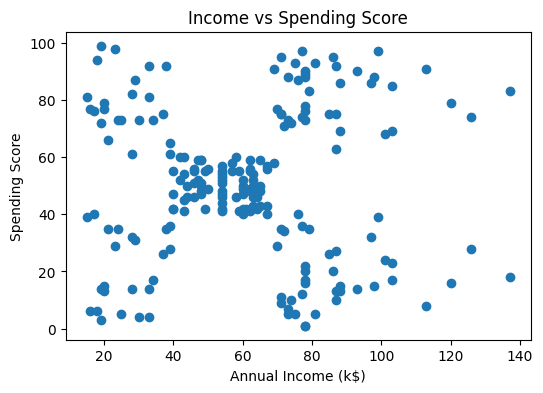

In [40]:
plt.figure(figsize=(6,4))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Score")
plt.show()

## Feature Scaling

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

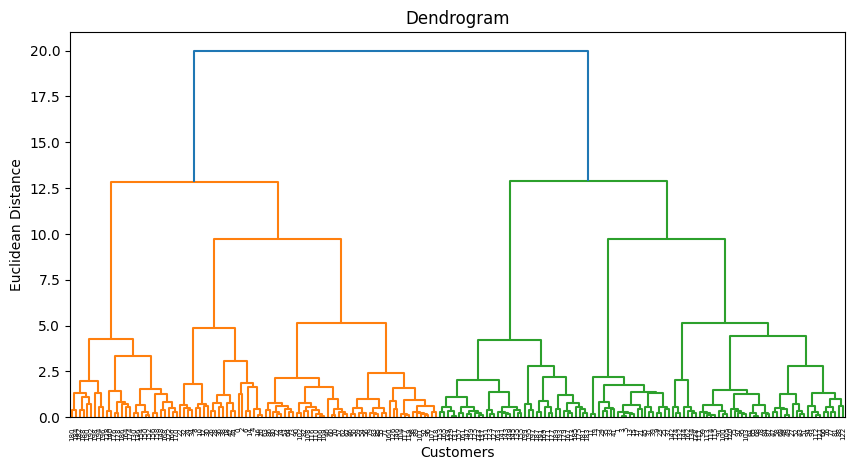

In [42]:
plt.figure(figsize=(10,5))
linked = linkage(X_scaled, method='ward')
dendrogram(linked)
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

In [43]:
hc = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',
    linkage='ward'
)
clusters = hc.fit_predict(X_scaled)

In [44]:
df['Cluster'] = clusters
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,3
197,198,Male,32,126,74,2
198,199,Male,32,137,18,3


## Cluster Visualization

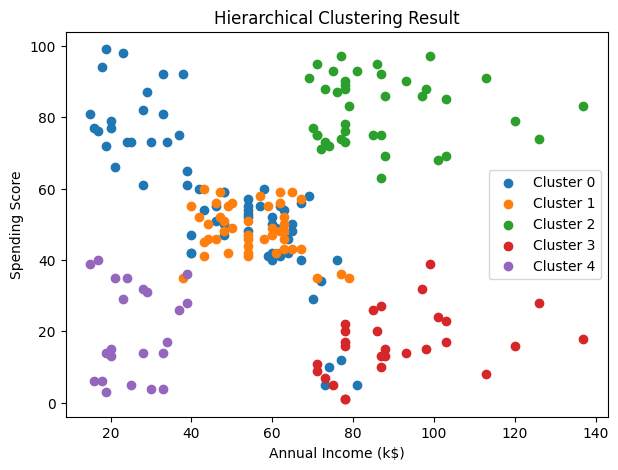

In [45]:
plt.figure(figsize=(7,5))

for i in range(5):
    plt.scatter(
        df[df['Cluster'] == i]['Annual Income (k$)'],
        df[df['Cluster'] == i]['Spending Score (1-100)'],
        label=f'Cluster {i}'
    )

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Hierarchical Clustering Result")
plt.legend()
plt.show()


## One Prediction of New Customer

In [51]:
new_customer = pd.DataFrame(
    [[30, 60, 50]],
    columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
)
new_customer_scaled = scaler.transform(new_customer)

combined_data = np.vstack([X_scaled, new_customer_scaled])
all_clusters = hc.fit_predict(combined_data)
cluster_label = all_clusters[-1]

print("The new customer belongs to Cluster:", cluster_label)

The new customer belongs to Cluster: 1


# --------------------------END--------------------------